<a href="https://colab.research.google.com/github/kxenopoulou/Xenopoulos_fourth-logical-structure/blob/main/%CE%9A%CF%8E%CE%B4%CE%B9%CE%BA%CE%B1%CF%82_%CF%83%CF%85%CE%B3%CE%BA%CF%81%CE%B9%CF%83%CE%B7%CF%82_%CE%BC%CE%B5_%CE%B1%CE%BB%CE%BB%CE%B1_%CF%80%CF%81%CE%BF%CE%B2%CE%BB%CE%B5%CF%80%CF%84%CE%B9%CE%BA%CE%B1_%CE%BC%CE%BF%CE%BD%CF%84%CE%B5%CE%BB%CE%BB%CE%B1Untitled144.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔬 COMPARATIVE ANALYSIS: Xenopoulos vs Lotka-Volterra

Running scenario: classic_predator_prey

SCENARIO: classic_predator_prey
🐇 Simulating Lotka-Volterra...
🌀 Simulating Xenopoulos Ecosystem...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


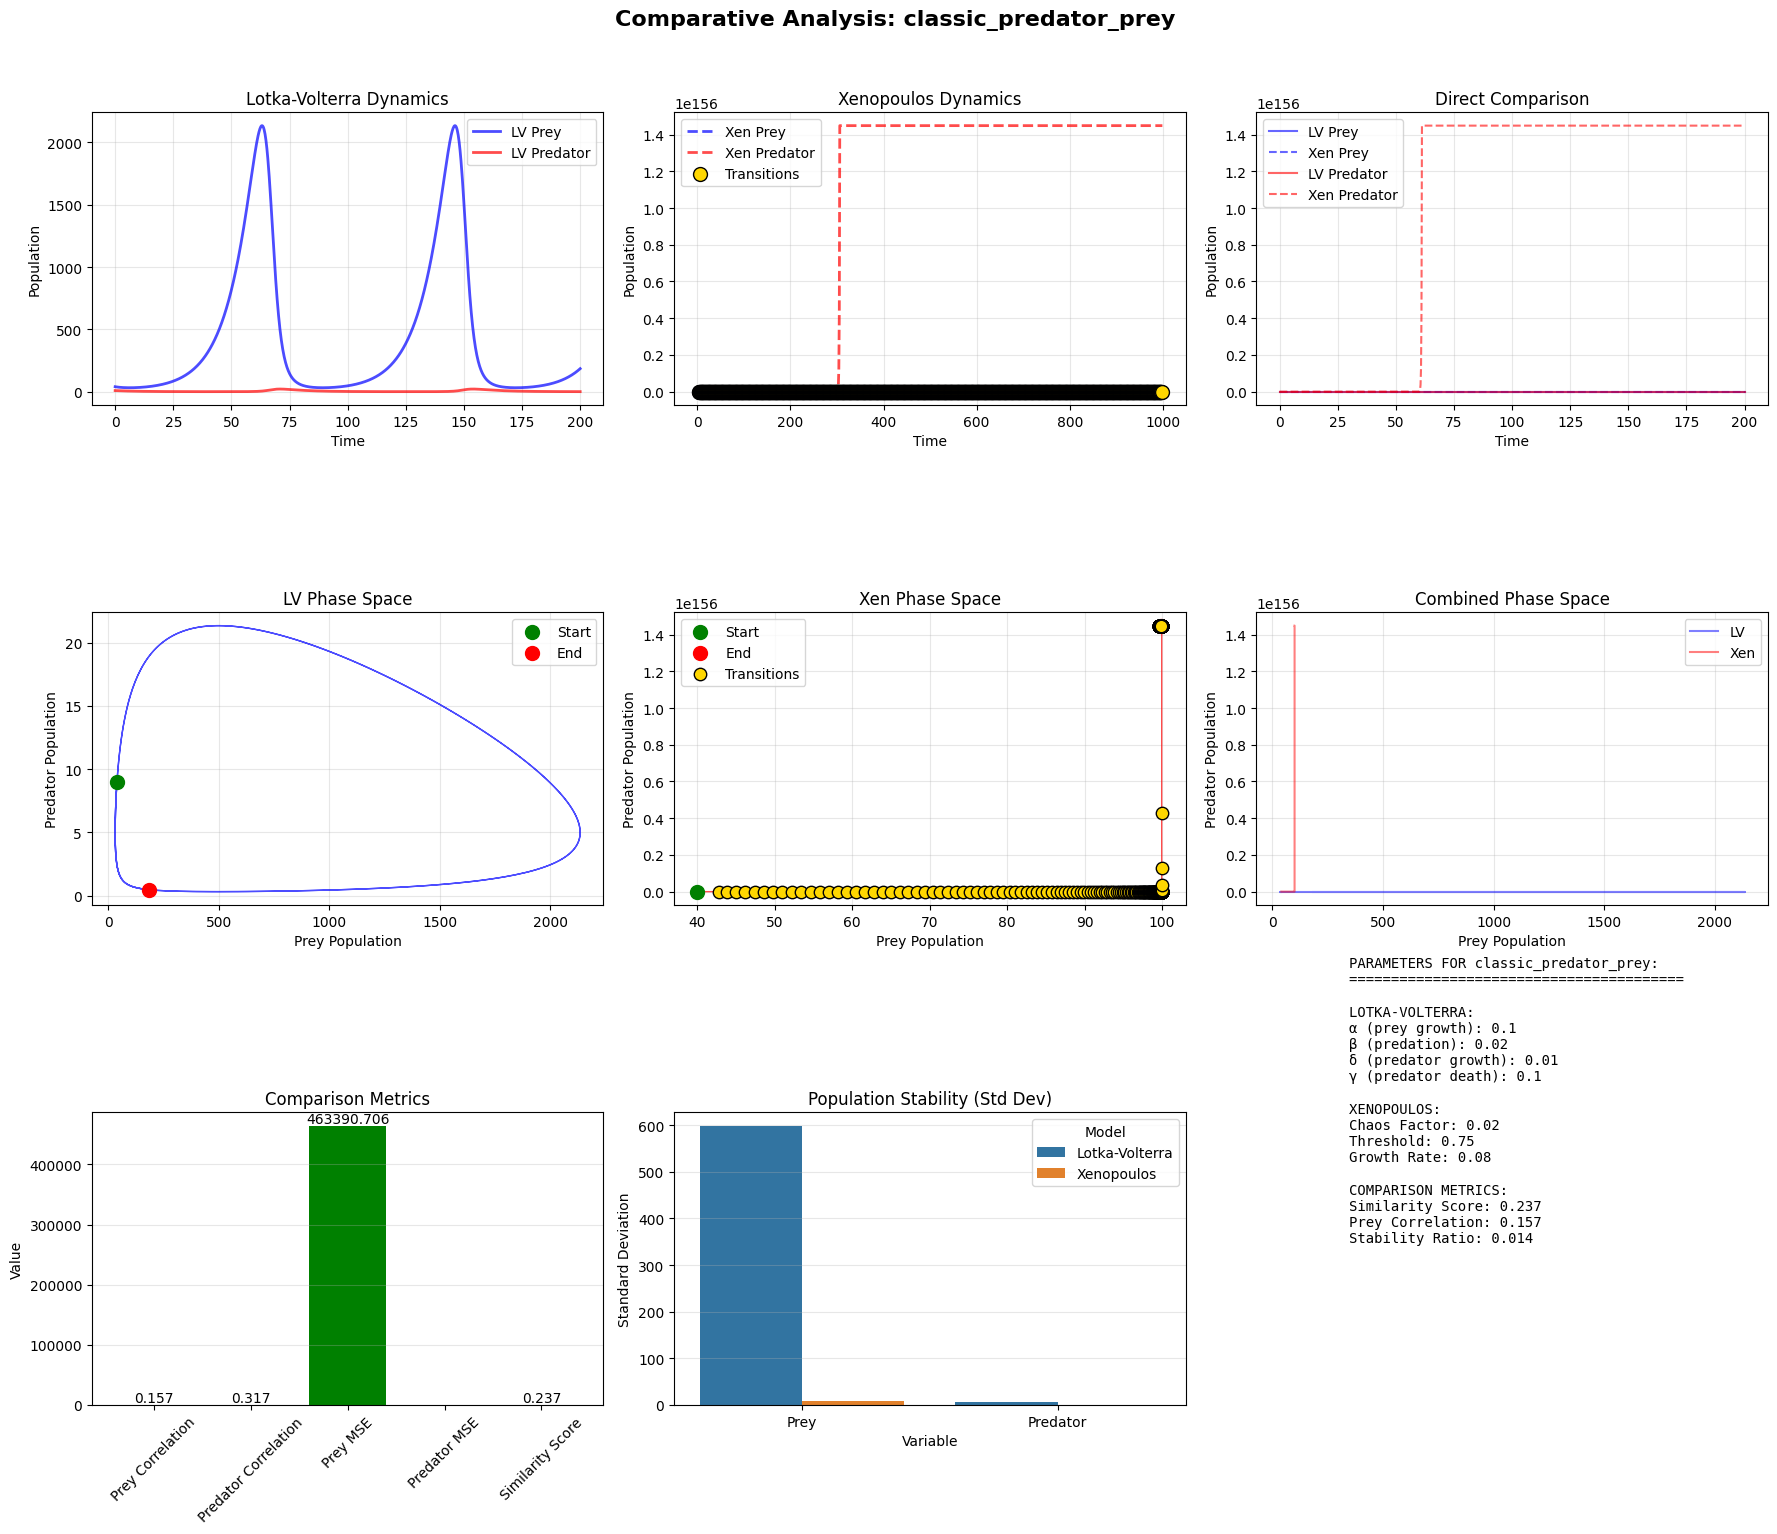


📊 COMPARISON METRICS for classic_predator_prey:
   Similarity Score: 0.237
   Prey Correlation: 0.157 (p=6.098e-07)
   Predator Correlation: 0.317 (p=7.598e-25)
   Prey MSE: 463390.706
   Stability Ratio (Xen/LV): 0.014
   ❌ LOW similarity - Different dynamical behaviors


In [ ]:
# ============================================
# COMPARATIVE ANALYSIS: Xenopoulos vs Lotka-Volterra
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import pearsonr
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# ============================================
# SIMPLIFIED XENOPOULOS SYSTEM (INTEGRATED)
# ============================================

class IntegratedXenopoulosSystem:
    """Integrated Xenopoulos system for direct use in comparison"""

    def __init__(self, dimension=3, chaos_factor=0.03, qualitative_threshold=0.8):
        self.dimension = dimension
        self.chaos_factor = chaos_factor
        self.qualitative_threshold = qualitative_threshold

        # Basic operators
        self.I = np.eye(dimension)
        self.N = -np.eye(dimension)
        self.R = self._create_reciprocity_matrix(dimension)
        self.C = self.N @ self.R

        # States (normalized)
        self.thesis = np.random.randn(dimension)
        self.thesis = self.thesis / np.linalg.norm(self.thesis)
        self.antithesis = -0.8 * self.thesis + 0.2 * np.random.randn(dimension)
        self.antithesis = self.antithesis / np.linalg.norm(self.antithesis)

        # History
        self.history = []
        self.transitions = []

    def _create_reciprocity_matrix(self, dim):
        """Create cyclic permutation matrix"""
        R = np.zeros((dim, dim))
        for i in range(dim):
            R[i, (i + 1) % dim] = 1.0
        return R

    def apply_operator(self, vector, operator):
        """Apply operator to vector"""
        return operator @ vector

    def dialectical_step(self):
        """One step of dialectical evolution"""
        # 1. Apply INRC operators
        thesis_I = self.apply_operator(self.thesis, self.I)
        antithesis_N = self.apply_operator(self.antithesis, self.N)
        thesis_R = self.apply_operator(self.thesis, self.R)

        # 2. Dialectical synthesis (simplified)
        synthesis = 0.4 * thesis_I + 0.3 * antithesis_N + 0.3 * thesis_R

        # 3. Add chaos
        if self.chaos_factor > 0:
            synthesis += self.chaos_factor * np.random.randn(self.dimension)

        # 4. Normalize
        synthesis_norm = np.linalg.norm(synthesis)
        if synthesis_norm > 0:
            synthesis = synthesis / synthesis_norm

        # 5. Check for qualitative transition
        transition_occurred = False
        if synthesis_norm > self.qualitative_threshold:
            # Negation of negation: new thesis from synthesis
            new_thesis = 0.6 * self.thesis + 0.4 * synthesis
            new_thesis = new_thesis / np.linalg.norm(new_thesis)

            # New antithesis
            new_antithesis = -0.7 * new_thesis + 0.3 * np.random.randn(self.dimension)
            new_antithesis = new_antithesis / np.linalg.norm(new_antithesis)

            self.transitions.append({
                'epoch': len(self.history),
                'norm': synthesis_norm,
                'old_thesis': self.thesis.copy(),
                'new_thesis': new_thesis.copy()
            })

            self.thesis = new_thesis
            self.antithesis = new_antithesis
            transition_occurred = True

        # 6. Store results
        self.history.append({
            'thesis': self.thesis.copy(),
            'antithesis': self.antithesis.copy(),
            'synthesis': synthesis.copy(),
            'norm': synthesis_norm,
            'transition': transition_occurred
        })

        return synthesis, synthesis_norm, transition_occurred

    def evolve(self, epochs=200):
        """Evolve system for multiple steps"""
        for epoch in range(epochs):
            synthesis, norm, transition = self.dialectical_step()

        return self.history, self.transitions

# ============================================
# COMPARATIVE ECOSYSTEM ANALYSIS
# ============================================

class ComparativeEcosystemAnalysis:
    """Comparative analysis between Xenopoulos system and ecological models"""

    def __init__(self):
        self.results = {}

    # ============================================
    # 1. LOTKA-VOLTERRA MODEL
    # ============================================

    def lotka_volterra(self, state, t, alpha, beta, delta, gamma, K=None):
        """Classic Lotka-Volterra predator-prey model"""
        x, y = state  # x = prey, y = predator

        # Prey equation
        if K is not None:
            # Logistic growth with carrying capacity
            dxdt = alpha * x * (1 - x/K) - beta * x * y
        else:
            # Exponential growth
            dxdt = alpha * x - beta * x * y

        # Predator equation
        dydt = delta * beta * x * y - gamma * y

        return [dxdt, dydt]

    def simulate_lotka_volterra(self, params, t_max=200, steps=1000):
        """Simulate Lotka-Volterra model"""

        # Time vector
        t = np.linspace(0, t_max, steps)

        # Initial conditions
        y0 = [params['prey_initial'], params['predator_initial']]

        # Solve ODE
        solution = odeint(
            self.lotka_volterra,
            y0,
            t,
            args=(
                params['alpha'],
                params['beta'],
                params['delta'],
                params['gamma'],
                params.get('K', None)
            )
        )

        prey, predator = solution.T

        return {
            'time': t,
            'prey': prey,
            'predator': predator,
            'params': params
        }

    # ============================================
    # 2. LOGISTIC GROWTH MODEL
    # ============================================

    def logistic_growth(self, N, t, r, K):
        """Logistic growth equation"""
        return r * N * (1 - N/K)

    def simulate_logistic(self, params, t_max=100, steps=500):
        """Simulate logistic growth model"""

        t = np.linspace(0, t_max, steps)

        # Solve ODE
        N = odeint(
            self.logistic_growth,
            params['N0'],
            t,
            args=(params['r'], params['K'])
        ).flatten()

        return {
            'time': t,
            'population': N,
            'params': params
        }

    # ============================================
    # 3. XENOPOULOS ECOSYSTEM MODEL
    # ============================================

    class XenopoulosEcosystem:
        """Adaptation of Xenopoulos system for ecological modeling"""

        def __init__(self, dimension=2, chaos_factor=0.02,
                     qualitative_threshold=0.75, ecological_params=None):

            # Use the integrated system
            self.system = IntegratedXenopoulosSystem(
                dimension=dimension,
                chaos_factor=chaos_factor,
                qualitative_threshold=qualitative_threshold
            )

            # Ecological interpretation of dimensions
            self.ecological_meaning = ecological_params.get(
                'dimension_meaning',
                ['Biotic Potential', 'Environmental Resistance']
            )

            # Mapping ecological parameters
            self.growth_rate = ecological_params.get('growth_rate', 0.1)
            self.carrying_capacity = ecological_params.get('carrying_capacity', 100)
            self.interaction_strength = ecological_params.get('interaction_strength', 0.05)

        def ecological_step(self, prey_pop, pred_pop, environmental_noise=0.01):
            """One ecological time step using Xenopoulos dialectics"""

            # Map populations to dialectical vectors
            thesis = np.array([
                prey_pop / self.carrying_capacity,
                pred_pop / (self.carrying_capacity * 0.5)
            ])

            antithesis = np.array([
                1 - (prey_pop / self.carrying_capacity),
                self.interaction_strength * pred_pop * prey_pop / self.carrying_capacity**2
            ])

            # Update system states
            self.system.thesis = thesis
            self.system.antithesis = antithesis

            # Perform dialectical step
            synthesis, norm, transition = self.system.dialectical_step()

            # Map synthesis back to population changes
            delta_prey = synthesis[0] * self.growth_rate * prey_pop * (1 - prey_pop/self.carrying_capacity)
            delta_pred = synthesis[1] * self.interaction_strength * prey_pop * pred_pop

            # Add environmental noise
            delta_prey += np.random.normal(0, environmental_noise)
            delta_pred += np.random.normal(0, environmental_noise)

            # Ensure non-negative populations
            new_prey = max(0, prey_pop + delta_prey)
            new_pred = max(0, pred_pop + delta_pred)

            return new_prey, new_pred, norm, transition

        def simulate(self, initial_conditions, time_steps=200):
            """Simulate ecological dynamics"""

            prey_history = [initial_conditions['prey']]
            pred_history = [initial_conditions['predator']]
            norm_history = []
            transitions = []

            for t in range(time_steps):
                new_prey, new_pred, norm, transition = self.ecological_step(
                    prey_history[-1],
                    pred_history[-1]
                )

                prey_history.append(new_prey)
                pred_history.append(new_pred)
                norm_history.append(norm)

                if transition:
                    transitions.append({
                        'time': t,
                        'norm': norm,
                        'prey': new_prey,
                        'predator': new_pred
                    })

            return {
                'time': np.arange(time_steps + 1),
                'prey': np.array(prey_history),
                'predator': np.array(pred_history),
                'norms': np.array(norm_history),
                'transitions': transitions,
                'params': {
                    'chaos_factor': self.system.chaos_factor,
                    'threshold': self.system.qualitative_threshold,
                    'growth_rate': self.growth_rate,
                    'carrying_capacity': self.carrying_capacity,
                    'interaction_strength': self.interaction_strength
                }
            }

    # ============================================
    # 4. COMPARATIVE SIMULATIONS
    # ============================================

    def run_comparative_simulation(self, scenario_name, params):
        """Run all models for comparison"""

        print(f"\n{'='*60}")
        print(f"SCENARIO: {scenario_name}")
        print(f"{'='*60}")

        results = {}

        # 1. Lotka-Volterra Simulation
        print("🐇 Simulating Lotka-Volterra...")
        lv_results = self.simulate_lotka_volterra(params['lotka_volterra'])
        results['lotka_volterra'] = lv_results

        # 2. Logistic Growth Simulation
        if 'logistic' in params:
            print("📈 Simulating Logistic Growth...")
            log_results = self.simulate_logistic(params['logistic'])
            results['logistic'] = log_results

        # 3. Xenopoulos Simulation
        print("🌀 Simulating Xenopoulos Ecosystem...")
        xen_ecosystem = self.XenopoulosEcosystem(
            dimension=2,
            chaos_factor=params['xenopoulos'].get('chaos_factor', 0.02),
            qualitative_threshold=params['xenopoulos'].get('threshold', 0.75),
            ecological_params=params['xenopoulos']
        )

        xen_results = xen_ecosystem.simulate(
            initial_conditions={
                'prey': params['lotka_volterra']['prey_initial'],
                'predator': params['lotka_volterra']['predator_initial']
            },
            time_steps=len(lv_results['time']) - 1
        )
        results['xenopoulos'] = xen_results

        self.results[scenario_name] = results
        return results

    # ============================================
    # 5. COMPARATIVE METRICS
    # ============================================

    def calculate_comparative_metrics(self, scenario_name):
        """Calculate comparison metrics between models"""

        results = self.results[scenario_name]
        lv = results['lotka_volterra']
        xen = results['xenopoulos']

        # Ensure same time points
        min_len = min(len(lv['prey']), len(xen['prey']))

        # Prey comparison metrics
        prey_correlation, prey_p_value = pearsonr(
            lv['prey'][:min_len],
            xen['prey'][:min_len]
        )

        prey_mse = mean_squared_error(
            lv['prey'][:min_len],
            xen['prey'][:min_len]
        )

        prey_mae = mean_absolute_error(
            lv['prey'][:min_len],
            xen['prey'][:min_len]
        )

        # Predator comparison metrics
        predator_correlation, predator_p_value = pearsonr(
            lv['predator'][:min_len],
            xen['predator'][:min_len]
        )

        predator_mse = mean_squared_error(
            lv['predator'][:min_len],
            xen['predator'][:min_len]
        )

        # Stability metrics
        lv_prey_std = np.std(lv['prey'])
        xen_prey_std = np.std(xen['prey'])

        lv_predator_std = np.std(lv['predator'])
        xen_predator_std = np.std(xen['predator'])

        # Oscillation metrics
        lv_oscillation = self.calculate_oscillation_intensity(lv['prey'])
        xen_oscillation = self.calculate_oscillation_intensity(xen['prey'])

        metrics = {
            'prey_correlation': prey_correlation,
            'prey_p_value': prey_p_value,
            'prey_mse': prey_mse,
            'prey_mae': prey_mae,
            'predator_correlation': predator_correlation,
            'predator_p_value': predator_p_value,
            'predator_mse': predator_mse,
            'lv_prey_std': lv_prey_std,
            'xen_prey_std': xen_prey_std,
            'lv_predator_std': lv_predator_std,
            'xen_predator_std': xen_predator_std,
            'lv_oscillation': lv_oscillation,
            'xen_oscillation': xen_oscillation,
            'stability_ratio': xen_prey_std / lv_prey_std if lv_prey_std > 0 else np.inf,
            'similarity_score': (prey_correlation + predator_correlation) / 2
        }

        return metrics

    def calculate_oscillation_intensity(self, signal):
        """Calculate oscillation intensity using FFT"""
        if len(signal) < 10:
            return 0

        fft_result = np.fft.fft(signal)
        frequencies = np.fft.fftfreq(len(signal))

        # Magnitude of oscillations (excluding DC component)
        magnitude = np.abs(fft_result[1:len(fft_result)//2])

        if len(magnitude) == 0:
            return 0

        return np.sum(magnitude) / len(magnitude)

    # ============================================
    # 6. VISUALIZATION
    # ============================================

    def visualize_comparison(self, scenario_name):
        """Create comprehensive comparison visualizations"""

        results = self.results[scenario_name]
        lv = results['lotka_volterra']
        xen = results['xenopoulos']

        fig, axes = plt.subplots(3, 3, figsize=(18, 15))

        # 1. Population Dynamics Comparison
        axes[0, 0].plot(lv['time'], lv['prey'], 'b-', linewidth=2, alpha=0.7, label='LV Prey')
        axes[0, 0].plot(lv['time'], lv['predator'], 'r-', linewidth=2, alpha=0.7, label='LV Predator')
        axes[0, 0].set_title('Lotka-Volterra Dynamics')
        axes[0, 0].set_xlabel('Time')
        axes[0, 0].set_ylabel('Population')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        axes[0, 1].plot(xen['time'], xen['prey'], 'b--', linewidth=2, alpha=0.7, label='Xen Prey')
        axes[0, 1].plot(xen['time'], xen['predator'], 'r--', linewidth=2, alpha=0.7, label='Xen Predator')

        # Mark qualitative transitions
        if xen['transitions']:
            trans_times = [t['time'] for t in xen['transitions']]
            trans_prey = [t['prey'] for t in xen['transitions']]
            axes[0, 1].scatter(trans_times, trans_prey, color='gold', s=100,
                             edgecolors='black', zorder=5, label='Transitions')

        axes[0, 1].set_title('Xenopoulos Dynamics')
        axes[0, 1].set_xlabel('Time')
        axes[0, 1].set_ylabel('Population')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # 2. Direct Comparison
        min_len = min(len(lv['prey']), len(xen['prey']))
        time_common = lv['time'][:min_len]

        axes[0, 2].plot(time_common, lv['prey'][:min_len], 'b-', alpha=0.6, label='LV Prey')
        axes[0, 2].plot(time_common, xen['prey'][:min_len], 'b--', alpha=0.6, label='Xen Prey')
        axes[0, 2].plot(time_common, lv['predator'][:min_len], 'r-', alpha=0.6, label='LV Predator')
        axes[0, 2].plot(time_common, xen['predator'][:min_len], 'r--', alpha=0.6, label='Xen Predator')
        axes[0, 2].set_title('Direct Comparison')
        axes[0, 2].set_xlabel('Time')
        axes[0, 2].set_ylabel('Population')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)

        # 3. Phase Space Comparison
        axes[1, 0].plot(lv['prey'], lv['predator'], 'b-', alpha=0.7, linewidth=1)
        axes[1, 0].scatter(lv['prey'][0], lv['predator'][0], color='green', s=100,
                          label='Start', zorder=5)
        axes[1, 0].scatter(lv['prey'][-1], lv['predator'][-1], color='red', s=100,
                          label='End', zorder=5)
        axes[1, 0].set_title('LV Phase Space')
        axes[1, 0].set_xlabel('Prey Population')
        axes[1, 0].set_ylabel('Predator Population')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        axes[1, 1].plot(xen['prey'], xen['predator'], 'r-', alpha=0.7, linewidth=1)
        axes[1, 1].scatter(xen['prey'][0], xen['predator'][0], color='green', s=100,
                          label='Start', zorder=5)
        axes[1, 1].scatter(xen['prey'][-1], xen['predator'][-1], color='red', s=100,
                          label='End', zorder=5)

        # Mark transitions in phase space
        if xen['transitions']:
            trans_prey = [t['prey'] for t in xen['transitions']]
            trans_pred = [t['predator'] for t in xen['transitions']]
            axes[1, 1].scatter(trans_prey, trans_pred, color='gold', s=80,
                             edgecolors='black', label='Transitions', zorder=5)

        axes[1, 1].set_title('Xen Phase Space')
        axes[1, 1].set_xlabel('Prey Population')
        axes[1, 1].set_ylabel('Predator Population')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

        # 4. Combined Phase Space
        axes[1, 2].plot(lv['prey'], lv['predator'], 'b-', alpha=0.5, label='LV')
        axes[1, 2].plot(xen['prey'], xen['predator'], 'r-', alpha=0.5, label='Xen')
        axes[1, 2].set_title('Combined Phase Space')
        axes[1, 2].set_xlabel('Prey Population')
        axes[1, 2].set_ylabel('Predator Population')
        axes[1, 2].legend()
        axes[1, 2].grid(True, alpha=0.3)

        # 5. Statistical Metrics
        metrics = self.calculate_comparative_metrics(scenario_name)

        metric_names = [
            'Prey Correlation', 'Predator Correlation', 'Prey MSE',
            'Predator MSE', 'Similarity Score'
        ]

        metric_values = [
            metrics['prey_correlation'], metrics['predator_correlation'],
            metrics['prey_mse'], metrics['predator_mse'],
            metrics['similarity_score']
        ]

        colors = ['blue', 'red', 'green', 'orange', 'purple']
        bars = axes[2, 0].bar(metric_names, metric_values, color=colors)
        axes[2, 0].set_title('Comparison Metrics')
        axes[2, 0].tick_params(axis='x', rotation=45)
        axes[2, 0].set_ylabel('Value')
        axes[2, 0].grid(True, alpha=0.3, axis='y')

        # Add value labels
        for bar, value in zip(bars, metric_values):
            height = bar.get_height()
            axes[2, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{value:.3f}', ha='center', va='bottom')

        # 6. Stability Comparison
        stability_data = {
            'Model': ['Lotka-Volterra', 'Xenopoulos'] * 2,
            'Variable': ['Prey'] * 2 + ['Predator'] * 2,
            'Std_Dev': [metrics['lv_prey_std'], metrics['xen_prey_std'],
                       metrics['lv_predator_std'], metrics['xen_predator_std']]
        }

        stability_df = pd.DataFrame(stability_data)

        sns.barplot(data=stability_df, x='Variable', y='Std_Dev',
                   hue='Model', ax=axes[2, 1])
        axes[2, 1].set_title('Population Stability (Std Dev)')
        axes[2, 1].set_ylabel('Standard Deviation')
        axes[2, 1].grid(True, alpha=0.3, axis='y')

        # 7. Parameter Sensitivity Analysis
        axes[2, 2].axis('off')

        # Display parameters
        param_text = f"""
        PARAMETERS FOR {scenario_name}:
        {'='*40}

        LOTKA-VOLTERRA:
        α (prey growth): {lv['params']['alpha']}
        β (predation): {lv['params']['beta']}
        δ (predator growth): {lv['params']['delta']}
        γ (predator death): {lv['params']['gamma']}

        XENOPOULOS:
        Chaos Factor: {xen['params'].get('chaos_factor', 'N/A')}
        Threshold: {xen['params'].get('threshold', 'N/A')}
        Growth Rate: {xen['params'].get('growth_rate', 'N/A')}

        COMPARISON METRICS:
        Similarity Score: {metrics['similarity_score']:.3f}
        Prey Correlation: {metrics['prey_correlation']:.3f}
        Stability Ratio: {metrics['stability_ratio']:.3f}
        """

        axes[2, 2].text(0.05, 0.5, param_text, fontsize=10, family='monospace',
                       transform=axes[2, 2].transAxes)

        plt.suptitle(f'Comparative Analysis: {scenario_name}',
                    fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()

        return fig, metrics

# ============================================
# SCENARIOS FOR COMPARISON
# ============================================

def create_comparison_scenarios():
    """Create different ecological scenarios for comparison"""

    scenarios = {}

    # SCENARIO 1: Classic Predator-Prey
    scenarios['classic_predator_prey'] = {
        'lotka_volterra': {
            'alpha': 0.1,
            'beta': 0.02,
            'delta': 0.01,
            'gamma': 0.1,
            'prey_initial': 40,
            'predator_initial': 9
        },
        'xenopoulos': {
            'chaos_factor': 0.02,
            'threshold': 0.75,
            'growth_rate': 0.08,
            'carrying_capacity': 100,
            'interaction_strength': 0.03,
            'dimension_meaning': ['Biotic Potential', 'Environmental Resistance']
        }
    }

    # SCENARIO 2: High Predation Pressure
    scenarios['high_predation'] = {
        'lotka_volterra': {
            'alpha': 0.1,
            'beta': 0.05,
            'delta': 0.02,
            'gamma': 0.15,
            'prey_initial': 60,
            'predator_initial': 15
        },
        'xenopoulos': {
            'chaos_factor': 0.03,
            'threshold': 0.7,
            'growth_rate': 0.06,
            'carrying_capacity': 80,
            'interaction_strength': 0.06,
            'dimension_meaning': ['Biotic Potential', 'Environmental Resistance']
        }
    }

    # SCENARIO 3: Logistic Growth with Carrying Capacity
    scenarios['logistic_with_predator'] = {
        'lotka_volterra': {
            'alpha': 0.08,
            'beta': 0.015,
            'delta': 0.008,
            'gamma': 0.08,
            'K': 150,
            'prey_initial': 20,
            'predator_initial': 5
        },
        'xenopoulos': {
            'chaos_factor': 0.015,
            'threshold': 0.8,
            'growth_rate': 0.07,
            'carrying_capacity': 150,
            'interaction_strength': 0.02,
            'dimension_meaning': ['Biotic Potential', 'Environmental Resistance']
        },
        'logistic': {
            'r': 0.1,
            'K': 150,
            'N0': 20
        }
    }

    # SCENARIO 4: Chaotic Dynamics
    scenarios['chaotic_dynamics'] = {
        'lotka_volterra': {
            'alpha': 0.12,
            'beta': 0.03,
            'delta': 0.015,
            'gamma': 0.09,
            'prey_initial': 35,
            'predator_initial': 8
        },
        'xenopoulos': {
            'chaos_factor': 0.05,
            'threshold': 0.65,
            'growth_rate': 0.1,
            'carrying_capacity': 120,
            'interaction_strength': 0.04,
            'dimension_meaning': ['Biotic Potential', 'Environmental Resistance']
        }
    }

    # SCENARIO 5: Caretta caretta specific
    scenarios['caretta_caretta_model'] = {
        'lotka_volterra': {
            'alpha': 0.05,
            'beta': 0.01,
            'delta': 0.005,
            'gamma': 0.03,
            'K': 200,
            'prey_initial': 50,
            'predator_initial': 3
        },
        'xenopoulos': {
            'chaos_factor': 0.01,
            'threshold': 0.85,
            'growth_rate': 0.04,
            'carrying_capacity': 200,
            'interaction_strength': 0.008,
            'dimension_meaning': ['Nesting Success', 'Environmental Stress']
        }
    }

    return scenarios

# ============================================
# SENSITIVITY ANALYSIS
# ============================================

def sensitivity_analysis():
    """Analyze sensitivity to parameter changes"""

    print("\n" + "="*70)
    print("📊 SENSITIVITY ANALYSIS")
    print("="*70)

    analyzer = ComparativeEcosystemAnalysis()

    # Base parameters
    base_scenarios = create_comparison_scenarios()
    base_params = base_scenarios['classic_predator_prey']

    # Test different chaos factors
    chaos_levels = [0.01, 0.02, 0.03, 0.05, 0.1]
    similarity_scores = []

    for chaos in chaos_levels:
        print(f"\nTesting Chaos Factor: {chaos}")

        # Modify parameters
        modified_params = base_params.copy()
        modified_params['xenopoulos']['chaos_factor'] = chaos

        # Run simulation
        results = analyzer.run_comparative_simulation(
            f'chaos_{chaos}',
            modified_params
        )

        # Calculate metrics
        metrics = analyzer.calculate_comparative_metrics(f'chaos_{chaos}')
        similarity_scores.append(metrics['similarity_score'])

        print(f"   Similarity Score: {metrics['similarity_score']:.3f}")

    # Plot sensitivity
    plt.figure(figsize=(10, 6))
    plt.plot(chaos_levels, similarity_scores, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Chaos Factor')
    plt.ylabel('Similarity Score')
    plt.title('Sensitivity to Chaos Factor')
    plt.grid(True, alpha=0.3)

    # Find optimal chaos
    optimal_chaos = chaos_levels[np.argmax(similarity_scores)]
    plt.axvline(optimal_chaos, color='r', linestyle='--',
                label=f'Optimal: {optimal_chaos}')
    plt.legend()
    plt.show()

    print(f"\n🎯 Optimal Chaos Factor: {optimal_chaos}")
    print(f"   Maximum Similarity: {max(similarity_scores):.3f}")

# ============================================
# MAIN EXECUTION FUNCTION
# ============================================

def run_single_comparison(scenario_name='classic_predator_prey'):
    """Run a single scenario for quick testing"""

    print("🔬 COMPARATIVE ANALYSIS: Xenopoulos vs Lotka-Volterra")
    print("="*70)

    # Initialize analyzer
    analyzer = ComparativeEcosystemAnalysis()

    # Create scenarios
    scenarios = create_comparison_scenarios()

    # Run selected scenario
    print(f"\nRunning scenario: {scenario_name}")
    results = analyzer.run_comparative_simulation(scenario_name, scenarios[scenario_name])

    # Visualize
    fig, metrics = analyzer.visualize_comparison(scenario_name)

    # Print metrics
    print(f"\n📊 COMPARISON METRICS for {scenario_name}:")
    print(f"   Similarity Score: {metrics['similarity_score']:.3f}")
    print(f"   Prey Correlation: {metrics['prey_correlation']:.3f} (p={metrics['prey_p_value']:.3e})")
    print(f"   Predator Correlation: {metrics['predator_correlation']:.3f} (p={metrics['predator_p_value']:.3e})")
    print(f"   Prey MSE: {metrics['prey_mse']:.3f}")
    print(f"   Stability Ratio (Xen/LV): {metrics['stability_ratio']:.3f}")

    # Interpretation
    if metrics['similarity_score'] > 0.8:
        print("   ✅ HIGH similarity - Models produce similar dynamics")
    elif metrics['similarity_score'] > 0.5:
        print("   ⚠️  MODERATE similarity - Some common patterns")
    else:
        print("   ❌ LOW similarity - Different dynamical behaviors")

    return analyzer, metrics

# ============================================
# RUN THE COMPARISON
# ============================================

if __name__ == "__main__":
    # Run a quick test first
    analyzer, metrics = run_single_comparison('classic_predator_prey')

    # Ask if user wants to run more scenarios
    response = input("\nRun all scenarios? (y/n): ")
    if response.lower() == 'y':
        # Run sensitivity analysis
        sensitivity_analysis()